<a href="https://colab.research.google.com/github/ShankarPoudel441/U-Net_implementations/blob/main/CBIS_DICOM_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 4.2 MB/s 


In [4]:
import pydicom
import pydicom as dicom
import matplotlib.pylab as plt

In [ ]:
# # specify your image path
# image_path = "/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mass-Training_P_00990_RIGHT_MLO/07-20-2016-DDSM-NA-57943/1.000000-full mammogram images-69759/1-1.dcm"
# ds = dicom.dcmread(image_path)

# plt.imshow(ds.pixel_array)

In [ ]:
# print (ds)

In [ ]:
# print(ds["SeriesInstanceUID"].value,"\n", ds["SeriesInstanceUID"].tag)

In [5]:
import os

path ="/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM"
#we shall store all the file names in this list
filelist = []
i=0

for root, dirs, files in os.walk(path):
  for file in files:
    i+=1
    print(i)
    filelist.append(os.path.join(root,file))   #append the file name to the list
  
  
print(len(filelist))

1
1


In [6]:
import os

arr = os.listdir("/content/drive/MyDrive/CBIS-DDSM/Mass/Train")
len(arr)

3867

In [ ]:
all_mass_data=[k for k in arr if 'Mass' in k]
mass_train=[k for k in all_mass_data if "Train" in k]
mass_test=[k for k in all_mass_data if "Test" in k]
len(all_mass_data)-len(mass_train)-len(mass_test)
print("Toal mass images = ", len(all_mass_data), "\n total in training = ", len(mass_train), '\n total in testing =', len(mass_test))

Toal mass images =  3867 
 total in training =  3867 
 total in testing = 0


In [ ]:
mass_test

[]

#Naming Conventions inside CBIS_DDSM :
For outer layer of name:
  
  A) Mass/Calc : mass data or calcification data

  b) Training/Test : training data or testing

  c) P_XXXXX : the patient_id

  d) LEFT_CC/RIGHT_CC/LEFT_MLO/Training_P_00990_RIGHT_MLO

  e) if there is some integer value at the end, it means there are multiple images for the patient

In [7]:
# import numpy as np

# DATA_FOLDER="/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM"

In [8]:
# example_paths=["Mass-Training_P_01009_RIGHT_CC_1/07-21-2016-DDSM-NA-24540/1.000000-ROI mask images-71266/1-1.dcm",
#                "Mass-Training_P_01009_RIGHT_CC_1/07-21-2016-DDSM-NA-24540/1.000000-ROI mask images-71266/1-2.dcm",
#                "Mass-Training_P_01009_RIGHT_MLO/07-20-2016-DDSM-NA-86546/1.000000-full mammogram images-12507/1-1.dcm",
#                "Mass-Training_P_01009_RIGHT_CC/07-20-2016-DDSM-NA-23801/1.000000-full mammogram images-60356/1-1.dcm",
#                "Mass-Training_P_01009_RIGHT_MLO_1/07-21-2016-DDSM-NA-50169/1.000000-ROI mask images-72271/1-1.dcm",
#                "Mass-Training_P_01009_RIGHT_MLO_1/07-21-2016-DDSM-NA-50169/1.000000-ROI mask images-72271/1-2.dcm"]

# ds=[]

# for path in example_paths:
#   ds.append(dicom.dcmread(DATA_FOLDER+"/"+path))



# # plt.imshow(ds[0].pixel_array, cmap="gray")
# # plt.title(f"{ds[0].PatientID},{ds[0].SeriesDescription}")


# pixel_arr=np.array([x.pixel_array for x in ds])


# # fig, ax = plt.subplots(nrows=1, ncols=len(example_paths), figsize = (44, 5))
# # # Plot image
# # for i in range(len(example_paths)):
# #   plt.imshow(ds[i].pixel_array, cmap="gray")
# #   plt.title(f"{ds[i].PatientID},{ds[i].SeriesDescription}")






In [9]:
# fig, ax = plt.subplots(nrows=1, ncols=len(example_paths), figsize = (44, 10))
# # Plot image
# for i in range(len(example_paths)):
#     ax[i].imshow(pixel_arr[i], cmap="gray")
#     ax[i].set_title(f"{ds[i].PatientID},{ds[i].SeriesDescription}")


#Managing the structure of files


In [10]:
# def count_dcm( top):

#     """
#     This function recursively walks through a given directory
#     (`top`) using depth-first search (bottom up) and counts the
#     number of .dcm files present.

#     Parameters
#     ----------
#     path : {str}
#         The directory to count.

#     Returns
#     -------
#     count : {int}
#         The number of .dcm files in `path`.
#     """

#     try:
#         count = 0

#         # Count number of .dcm files in ../data/Mass/Test.
#         for _, _, files in os.walk(top):
#             for f in files:
#                 if f.endswith(".dcm"):
#                     count += 1

#     except Exception as e:
#         print((f"Unable to count_dcm!\n{e}"))

#     return count

In [11]:
# count_dcm(top="/content/drive/MyDrive/CBIS-DDSM/Mass/Train")

In [12]:
# count_dcm(top="/content/drive/MyDrive/CBIS-DDSM/Calc")

In [13]:
# before = count_dcm(top=DATA_FOLDER)
# print(len(before))

In [14]:
# def new_name_dcm(dcm_path):

#     """
#     This function takes the absolute path of a .dcm file
#     and renames it according to the convention below:

#     1. Full mammograms:
#         - Mass-Training_P_00001_LEFT_CC_FULL.dcm
#     2. Cropped image:
#         - Mass-Training_P_00001_LEFT_CC_CROP_1.dcm
#         - Mass-Training_P_00001_LEFT_CC_CROP_2.dcm
#         - ...
#     3. Mask image:
#         - Mass-Training_P_00001_LEFT_CC_MASK_1.dcm
#         - Mass-Training_P_00001_LEFT_CC_MASK_2.dcm
#         - ...


#     Parameters
#     ----------
#     dcm_path : {str}
#         The relative (or absolute) path of the .dcm file
#         to rename, including the .dcm filename.
#         e.g. "source_folder/Mass-Training_P_00001_LEFT_CC/1-1.dcm"

#     Returns
#     -------
#     new_name : {str}
#         The new name that the .dcm file should have
#         WITH the ".dcm" extention WITHOUT its relative
#         (or absolute) path.
#         e.g. "Mass-Training_P_00001_LEFT_CC_FULL.dcm"
#     False : {boolean}
#         False is returned if the new name of the .dcm
#         file cannot be determined.
#     """

#     try:
#         # Read dicom.
#         ds = pydicom.dcmread(dcm_path)

#         # Get information.
#         patient_id = ds.PatientID
#         patient_id = patient_id.replace(".dcm", "")

#         try:
#             # If ds contains SeriesDescription attribute...
#             img_type = ds.SeriesDescription

#             # === FULL ===
#             if "full" in img_type:
#                 new_name = patient_id + "_FULL" + ".dcm"
#                 print(f"FULL --- {new_name}")
#                 return new_name

#             # === CROP ===
#             elif "crop" in img_type:

#                 # Double check if suffix is integer.
#                 suffix = patient_id.split("_")[-1]

#                 if suffix.isdigit():
#                     new_patient_id = patient_id.split("_" + suffix)[0]
#                     new_name = new_patient_id + "_CROP" + "_" + suffix + ".dcm"
#                     print(f"CROP --- {new_name}")
#                     return new_name

#                 elif not suffix.isdigit():
#                     print(f"CROP ERROR, {patient_id}")
#                     return False

#             # === MASK ===
#             elif "mask" in img_type:

#                 # Double check if suffix is integer.
#                 suffix = patient_id.split("_")[-1]

#                 if suffix.isdigit():
#                     new_patient_id = patient_id.split("_" + suffix)[0]
#                     new_name = new_patient_id + "_MASK" + "_" + suffix + ".dcm"
#                     print(f"MASK --- {new_name}")
#                     return new_name

#                 elif not suffix.isdigit():
#                     print(f"MASK ERROR, {patient_id}")
#                     return False

#         except:
#             # If ds does not contain SeriesDescription...
#             # === FULL ===
#             if "full" in dcm_path:
#                 new_name = patient_id + "_FULL" + ".dcm"
#                 return new_name

#             else:
#                 # Read the image to decide if its a mask or crop.
#                 # MASK only has pixel values {0, 1}
#                 arr = ds.pixel_array
#                 unique = np.unique(arr).tolist()

#                 if len(unique) != 2:

#                     # === CROP ===
#                     # Double check if suffix is integer.
#                     suffix = patient_id.split("_")[-1]

#                     if suffix.isdigit():
#                         new_patient_id = patient_id.split("_" + suffix)[0]
#                         new_name = new_patient_id + "_CROP" + "_" + suffix + ".dcm"
#                         print(f"CROP --- {new_name}")
#                         return new_name

#                     elif not suffix.isdigit():
#                         print(f"CROP ERROR, {patient_id}")
#                         return False

#                 elif len(unique) == 2:

#                     # === MASK ===
#                     # Double check if suffix is integer.
#                     suffix = patient_id.split("_")[-1]

#                     if suffix.isdigit():
#                         new_patient_id = patient_id.split("_" + suffix)[0]
#                         new_name = new_patient_id + "_MASK" + "_" + suffix + ".dcm"
#                         print(f"MASK --- {new_name}")
#                         return new_name

#                     elif not suffix.isdigit():
#                         print(f"MASK ERROR, {patient_id}")
#                         return False
#                 else:
#                     return img_type

#     except Exception as e:
#         # logger.error(f'Unable to new_name_dcm!\n{e}')
#         print((f"Unable to new_name_dcm!\n{e}"))

In [15]:
# s=new_name_dcm("/content/drive/MyDrive/CBIS-DDSM-try/CBIS-DDSM/Mass-Test_P_00017_LEFT_CC_1/10-04-2016-DDSM-NA-30118/1.000000-ROI mask images-03672/1-2.dcm")

# print("sdfsdfsaf",s)

In [16]:

# ds = pydicom.dcmread("/content/drive/MyDrive/CBIS-DDSM-try/CBIS-DDSM/Mass-Test_P_00017_LEFT_CC_1/10-04-2016-DDSM-NA-30118/1.000000-ROI mask images-03672/1-2.dcm")

# plt.imshow(ds.pixel_array)

# ds

In [17]:
# import shutil


# def move_dcm_up(dest_dir, source_dir, dcm_filename):

#     """
#     This function move a .dcm file from its given source
#     directory into the given destination directory. It also
#     handles conflicting filenames by adding "___a" to the
#     end of a filename if the filename already exists in the
#     destination directory.

#     Parameters
#     ----------
#     dest_dir : {str}
#         The relative (or absolute) path of the folder that
#         the .dcm file needs to be moved to.
#     source_dir : {str}
#         The relative (or absolute) path where the .dcm file
#         needs to be moved from, including the filename.
#         e.g. "source_folder/Mass-Training_P_00001_LEFT_CC_FULL.dcm"
#     dcm_filename : {str}
#         The name of the .dcm file WITH the ".dcm" extension
#         but WITHOUT its (relative or absolute) path.
#         e.g. "Mass-Training_P_00001_LEFT_CC_FULL.dcm".

#     Returns
#     -------
#     None
#     """

#     try:
#         dest_dir_with_new_name = os.path.join(dest_dir, dcm_filename)

#         # If the destination path does not exist yet...
#         print(dcm_filename)
#         print(dest_dir_with_new_name)
#         if not os.path.exists(dest_dir_with_new_name):
#             shutil.move(source_dir, dest_dir_with_new_name)

#         # If the destination path already exists...
#         elif os.path.exists(dest_dir_with_new_name):
#             # Add "_a" to the end of `new_name` generated above.
#             new_name_2 = dcm_filename.strip(".dcm") + "___a.dcm"
#             print(new_name_2)
#             move_dcm_up(dest_dir,source_dir,new_name_2)
#             # This moves the file into the destination while giving the file its new name.
#             # shutil.move(source_dir, os.path.join(dest_dir, new_name_2))

#     except Exception as e:
#         # logger.error(f'Unable to move_dcm_up!\n{e}')
#         print((f"Unable to move_dcm_up!\n{e}"))

In [18]:
# source_dir="/content/drive/MyDrive/CBIS-DDSM-try/CBIS-DDSM/Mass-Test_P_00017_LEFT_CC_1/10-04-2016-DDSM-NA-30118/1.000000-ROI mask images-03672/1-2.dcm"
# dest_dir="/content/drive/MyDrive/CBIS-DDSM-try/Mass/Test"
# new_name='Mass-Test_P_00017_LEFT_CC_MASK_1.dcm'

# move_dcm_up(dest_dir,source_dir,new_name)

# # shutil.move(source_dir, os.path.join(dest_dir, new_name))

In [19]:
# from google.colab import files
# uploaded = files.upload()

# !cp "1-2.dcm" "/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM/Mass-Training_P_00999_LEFT_CC_1/07-21-2016-DDSM-NA-73722/1.000000-ROI mask images-34958/1-2.dcm"

In [20]:
# import pandas as pd


# def delete_empty_folders(top, error_dir):

#     """
#     This function recursively walks through a given directory
#     (`top`) using depth-first search (bottom up) and deletes
#     any directory that is empty (ignoring hidden files).
#     If there are directories that are not empty (except hidden
#     files), it will save the absolute directory in a Pandas
#     dataframe and export it as a `not-empty-folders.csv` to
#     `error_dir`.

#     Parameters
#     ----------
#     top : {str}
#         The directory to iterate through.
#     error_dir : {str}
#         The directory to save the `not-empty-folders.csv` to.

#     Returns
#     -------
#     None
#     """

#     try:
#         curdir_list = []
#         files_list = []

#         for (curdir, dirs, files) in os.walk(top=top, topdown=False):

#             if curdir != str(top):

#                 dirs.sort()
#                 files.sort()

#                 print(f"WE ARE AT: {curdir}")
#                 print("=" * 10)

#                 print("List dir:")

#                 directories_list = [
#                     f for f in os.listdir(curdir) if not f.startswith(".")
#                 ]
#                 print(directories_list)

#                 if len(directories_list) == 0:
#                     print("DELETE")
#                     shutil.rmtree(curdir, ignore_errors=True)

#                 elif len(directories_list) > 0:
#                     print("DON'T DELETE")
#                     curdir_list.append(curdir)
#                     files_list.append(directories_list)

#                 print()
#                 print("Moving one folder up...")
#                 print("-" * 40)
#                 print()

#         if len(curdir_list) > 0:
#             not_empty_df = pd.DataFrame(
#                 list(zip(curdir_list, files_list)), columns=["curdir", "files"]
#             )
#             to_save_path = os.path.join(error_dir, "not-empty-folders.csv")
#             not_empty_df.to_csv(to_save_path, index=False)

#     except Exception as e:
#         # logger.error(f'Unable to delete_empty_folders!\n{e}')
#         print((f"Unable to delete_empty_folders!\n{e}"))


In [21]:
# top = "/content/drive/MyDrive/CBIS-DDSM-try/CBIS-DDSM"
# delete_empty_folders(top, top)

In [22]:
# import os
# import shutil
# import pprint
# import pandas as pd
# import numpy as np
# import pydicom
# from pathlib import Path

In [23]:
# #Make the file structure

# top = "/content/drive/MyDrive/CBIS-DDSM-try"


In [24]:
# top = Path(top)

# # ==============================================
# # 1. Count number of .dcm files BEFORE executing
# # ==============================================
# before = count_dcm(top=top)

# print("before",before)
# print("-" * 30)
# print("-" * 30)
# # ==========
# # 2. Execute
# # ==========

# a=0

# # 2.1. Rename and move .dcm files.
# # --------------------------------
# for (curdir, dirs, files) in os.walk(top=top, topdown=False):

#     dirs.sort()
#     files.sort()
    

#     for f in files:

#         # === Step 1: Rename .dcm file ===
#         if f.endswith(".dcm"):

#             a+=1

#             old_name_path = os.path.join(curdir, f)
#             new_name = new_name_dcm(dcm_path=old_name_path)

#             if new_name:
#                 new_name_path = os.path.join(curdir, new_name)
#                 os.rename(old_name_path, new_name_path)

#                 # === Step 2: Move RENAMED .dcm file ===
#                 if "Mass" in new_name_path: 
#                   path_1="Mass"
#                 elif "Calc" in new_name_path:
#                   path_1="Calc"
                
#                 if "Train" in new_name_path:
#                   path_2="Train"
#                 elif "Test" in new_name_path:
#                   path_2="Test"

                
#                 # print("to_folder",os.path.join(top, path_1, path_2),"\n",
#                 #       "fron_dir",new_name_path,"\n"
#                 #       "new_file_name", new_name)

#                 if a%100 == 0:
#                   print("here is a", a)
                
#                 move_dcm_up(
#                     dest_dir=os.path.join(top, path_1, path_2), 
#                     source_dir=new_name_path, 
#                     dcm_filename=new_name
#                 )

# # 2.2. Delete empty folders.
# # --------------------------
# delete_empty_folders(top=top, error_dir=top)

# # =============================================
# # 3. Count number of .dcm files AFTER executing
# # =============================================
# after = count_dcm(top=top)

# print(f"BEFORE --> Number of .dcm files: {before}")
# print(f"AFTER --> Number of .dcm files: {after}")
# print()
# print("Getting out of extractDicom.")
# print("-" * 30)


In [25]:
###### Checked and removed misspelled files###

# a=0
# base="/content/drive/MyDrive/CBIS-DDSM/Mass/Train"
# for (curdir, dirs, files) in os.walk(base):
#   with_as=[x for x in files if "__a" in x]

# for i in with_as:
#   old_path_name=os.path.join(base,i)
#   new_path_name=os.path.join(base,i.replace("___a",""))
#   os.rename(old_path_name, new_path_name)
#   print("old_path_name",old_path_name,"\n new_path_name",new_path_name)

# # print(len(as_full))
# # as_full

# print(len(with_as))

In [26]:
# for (curdir, dirs, files) in os.walk(top="/content/drive/MyDrive/CBIS-DDSM/CBIS-DDSM", topdown=False):
#   if len(files)>0:
#     print(files[0])
#   print(len(files))

In [ ]:
#Image Preprocesing

In [28]:
import numpy as np
import cv2
import pydicom

In [29]:
def cropBorders(img, l=0.01, r=0.01, u=0.04, d=0.04):

    nrows, ncols = img.shape

    # Get the start and end rows and columns
    l_crop = int(ncols * l)
    r_crop = int(ncols * (1 - r))
    u_crop = int(nrows * u)
    d_crop = int(nrows * (1 - d))

    cropped_img = img[u_crop:d_crop, l_crop:r_crop]

    return cropped_img

In [30]:
def minMaxNormalise(img):

    norm_img = (img - img.min()) / (img.max() - img.min())

    return norm_img

In [31]:
def globalBinarise(img, thresh, maxval):

    binarised_img = np.zeros(img.shape, np.uint8)
    binarised_img[img >= thresh] = maxval

    return binarised_img


In [32]:
def editMask(mask, ksize=(23, 23), operation="open"):

    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=ksize)

    if operation == "open":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    elif operation == "close":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Then dilate
    edited_mask = cv2.morphologyEx(edited_mask, cv2.MORPH_DILATE, kernel)

    return edited_mask

In [33]:
def sortContoursByArea(contours, reverse=True):

    # Sort contours based on contour area.
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=reverse)

    # Construct the list of corresponding bounding boxes.
    bounding_boxes = [cv2.boundingRect(c) for c in sorted_contours]

    return sorted_contours, bounding_boxes

In [34]:
def xLargestBlobs(mask, top_x=None, reverse=True):

    # Find all contours from binarised image.
    # Note: parts of the image that you want to get should be white.
    contours, hierarchy = cv2.findContours(
        image=mask, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE
    )

    n_contours = len(contours)

    # Only get largest blob if there is at least 1 contour.
    if n_contours > 0:

        # Make sure that the number of contours to keep is at most equal
        # to the number of contours present in the mask.
        if n_contours < top_x or top_x == None:
            top_x = n_contours

        # Sort contours based on contour area.
        sorted_contours, bounding_boxes = sortContoursByArea(
            contours=contours, reverse=reverse
        )

        # Get the top X largest contours.
        X_largest_contours = sorted_contours[0:top_x]

        # Create black canvas to draw contours on.
        to_draw_on = np.zeros(mask.shape, np.uint8)

        # Draw contours in X_largest_contours.
        X_largest_blobs = cv2.drawContours(
            image=to_draw_on,  # Draw the contours on `to_draw_on`.
            contours=X_largest_contours,  # List of contours to draw.
            contourIdx=-1,  # Draw all contours in `contours`.
            color=1,  # Draw the contours in white.
            thickness=-1,  # Thickness of the contour lines.
        )

    return n_contours, X_largest_blobs

In [35]:
def applyMask(img, mask):

    masked_img = img.copy()
    masked_img[mask == 0] = 0

    return masked_img

In [ ]:
def checkLRFlip(mask):

    # Get number of rows and columns in the image.
    nrows, ncols = mask.shape
    x_center = ncols // 2
    y_center = nrows // 2

    # Sum down each column.
    col_sum = mask.sum(axis=0)
    # Sum across each row.
    row_sum = mask.sum(axis=1)

    left_sum = sum(col_sum[0:x_center])
    right_sum = sum(col_sum[x_center:-1])

    if left_sum < right_sum:
        LR_flip = True
    else:
        LR_flip = False

    return LR_flip


def makeLRFlip(img):

    flipped_img = np.fliplr(img)

    return flipped_img

In [ ]:
def clahe(img, clip=2.0, tile=(8, 8)):

    img = cv2.normalize(
        img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )
    img_uint8 = img.astype("uint8")

    clahe_create = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
    clahe_img = clahe_create.apply(img_uint8)

    return clahe_img

In [ ]:
def pad(img):

    nrows, ncols = img.shape

    # If padding is required...
    if nrows != ncols:

        # Take the longer side as the target shape.
        if ncols < nrows:
            target_shape = (nrows, nrows)
        elif nrows < ncols:
            target_shape = (ncols, ncols)

        # pad.
        padded_img = np.zeros(shape=target_shape)
        padded_img[:nrows, :ncols] = img

    # If padding is not required...
    elif nrows == ncols:

        # Return original image.
        padded_img = img

    return padded_img

In [ ]:
l=.001
r=.04
d=.01
u=0.1
thresh=0.1
maxval=1
ksize=23 
operation="open"
reverse=True
top_x=1
clip=2.0
tile=8

In [ ]:
def fullMammoPreprocess(img,
                        l=l,
                        r=r,
                        d=d,
                        u=u,
                        thresh=thresh,
                        maxval=maxval,
                        ksize=ksize, 
                        operation=operation,
                        reverse=reverse,
                        top_x=top_x,
                        clip=clip,
                        tile=tile):

    # Step 1: Initial crop.
    cropped_img = cropBorders(img=img, l=l, r=r, d=d, u=u)

    # Step 2: Min-max normalise.
    norm_img = minMaxNormalise(img=cropped_img)

    # Step 3: Remove artefacts.
    binarised_img = globalBinarise(img=norm_img, thresh=thresh, maxval=maxval)
    edited_mask = editMask(
        mask=binarised_img, ksize=(ksize, ksize), operation=operation
    )
    _, xlargest_mask = xLargestBlobs(mask=edited_mask, top_x=top_x, reverse=reverse)

    masked_img = applyMask(img=norm_img, mask=xlargest_mask)

    # Step 4: Horizontal flip.
    lr_flip = checkLRFlip(mask=xlargest_mask)
    if lr_flip:
        flipped_img = makeLRFlip(img=masked_img)
    elif not lr_flip:
        flipped_img = masked_img

    # Step 5: CLAHE enhancement.
    clahe_img = clahe(img=flipped_img, clip=clip, tile=(tile, tile))

    # Step 6: pad.
    padded_img = pad(img=clahe_img)
    padded_img = cv2.normalize(
        padded_img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )

    # Step 7: Min-max normalise.
    img_pre = minMaxNormalise(img=padded_img)

    return img_pre, lr_flip

(4006, 1846)

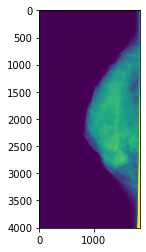

In [ ]:
ds = pydicom.dcmread("/content/drive/MyDrive/CBIS-DDSM/Mass/Test/Mass-Test_P_00016_LEFT_CC_FULL.dcm")
plt.imshow(ds.pixel_array)

ds.pixel_array.shape


(3565, 3565)

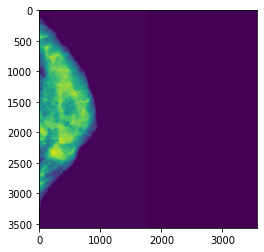

In [ ]:
img_pre, lr_flip = fullMammoPreprocess(ds.pixel_array)
plt.imshow(img_pre)
# plt.imshow(lr_flip)

img_pre.shape

In [ ]:
def maskPreprocess(mask, 
                   lr_flip,
                   l=l,
                   r=r,
                   d=d,
                   u=u):

    # Step 1: Initial crop.
    cropped_img = cropBorders(img=mask, l=l, r=r, d=d, u=u)

    # Step 2: Horizontal flip.
    if lr_flip:
        cropped_img = makeLRFlip(img=cropped_img)

    # Step 3: Pad.
    mask_pre = pad(img=cropped_img)

    return mask_pre

(4006, 1846)

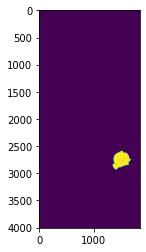

In [ ]:
mask = pydicom.dcmread("/content/drive/MyDrive/CBIS-DDSM/Mass/Test/Mass-Test_P_00016_LEFT_CC_MASK_1.dcm")
plt.imshow(mask.pixel_array)

mask.pixel_array.shape


(3565, 3565)

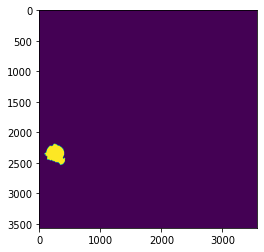

In [ ]:
masked_preprocessed=maskPreprocess(mask=mask.pixel_array,lr_flip=lr_flip)


plt.imshow(masked_preprocessed)
masked_preprocessed.shape

In [ ]:
def sumMasks(mask_list):

    """
    This function sums a list of given masks.
    Parameters
    ----------
    mask_list : {list of numpy.ndarray}
        A list of masks (numpy.ndarray) that needs to be summed.
    Returns
    -------
    summed_mask_bw: {numpy.ndarray}
        The summed mask, ranging from [0, 1].
    """

    try:

        summed_mask = np.zeros(mask_list[0].shape)

        for arr in mask_list:
            summed_mask = np.add(summed_mask, arr)

        # Binarise (there might be some overlap, resulting in pixels with
        # values of 510, 765, etc...)
        _, summed_mask_bw = cv2.threshold(
            src=summed_mask, thresh=1, maxval=255, type=cv2.THRESH_BINARY
        )

    except Exception as e:
        # logger.error(f'Unable to findMultiTumour!\n{e}')
        print((f"Unable to get findMultiTumour!\n{e}"))

    return summed_mask_bw

0


In [ ]:
a=0
for (curdir, dirs, files) in os.walk("/content/drive/MyDrive/CBIS-DDSM/Mass/Train"):
  as_2_mask=[x for x in files if ("_2" in x) and ("MASK" in x)]

print(len(as_2_mask))
as_2_mask

68


['Mass-Training_P_01039_RIGHT_MLO_MASK_2.dcm',
 'Mass-Training_P_00914_LEFT_CC_MASK_2.dcm',
 'Mass-Training_P_01600_RIGHT_MLO_MASK_2.dcm',
 'Mass-Training_P_01343_LEFT_CC_MASK_2.dcm',
 'Mass-Training_P_00778_RIGHT_MLO_MASK_2.dcm',
 'Mass-Training_P_00432_LEFT_CC_MASK_2.dcm',
 'Mass-Training_P_00207_LEFT_CC_MASK_2.dcm',
 'Mass-Training_P_00044_RIGHT_CC_MASK_2.dcm',
 'Mass-Training_P_00106_RIGHT_MLO_MASK_2.dcm',
 'Mass-Training_P_01494_LEFT_MLO_MASK_2.dcm',
 'Mass-Training_P_00914_LEFT_MLO_MASK_2.dcm',
 'Mass-Training_P_00309_LEFT_MLO_MASK_2.dcm',
 'Mass-Training_P_00432_LEFT_MLO_MASK_2.dcm',
 'Mass-Training_P_01273_RIGHT_CC_MASK_2.dcm',
 'Mass-Training_P_01262_RIGHT_CC_MASK_2.dcm',
 'Mass-Training_P_00092_LEFT_MLO_MASK_2.dcm',
 'Mass-Training_P_00678_LEFT_MLO_MASK_2.dcm',
 'Mass-Training_P_00309_LEFT_CC_MASK_2.dcm',
 'Mass-Training_P_00431_RIGHT_MLO_MASK_2.dcm',
 'Mass-Training_P_01103_RIGHT_MLO_MASK_2.dcm',
 'Mass-Training_P_00802_LEFT_MLO_MASK_2.dcm',
 'Mass-Training_P_00106_LEFT_CC_M

In [ ]:
a=0
for (curdir, dirs, files) in os.walk("/content/drive/MyDrive/CBIS-DDSM/Mass/Train"):
  as_crop=[x for x in files if ("__a" in x) and ("CROP" in x)]


print(len(as_crop))
as_crop

0


[]

In [ ]:
# ds0=pydicom.dcmread("/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00004_LEFT_MLO_FULL.dcm")
# # ds1=pydicom.dcmread("/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00001_LEFT_CC_FULL___a.dcm")

In [ ]:
for ds in as_mask:
  to=os.path.join("/content/drive/MyDrive/CBIS-DDSM/Mass/Train/",ds.replace("___a.dcm",".dcm"))
  # to=os.path.join("/content/drive/MyDrive/CBIS-DDSM/Mass/Train/",ds)
  print(to)
  try:
    
    ds0=pydicom.dcmread(to)
    print(1)
  except:
    print("False")

/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_01039_RIGHT_MLO_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00914_LEFT_CC_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_01600_RIGHT_MLO_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_01343_LEFT_CC_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00778_RIGHT_MLO_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00432_LEFT_CC_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00207_LEFT_CC_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00044_RIGHT_CC_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00106_RIGHT_MLO_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_01494_LEFT_MLO_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00914_LEFT_MLO_MASK_2.dcm
1
/content/drive/MyDrive/CBIS-DDSM

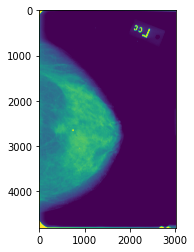

In [ ]:
MASKds=pydicom.dcmread("/content/drive/MyDrive/CBIS-DDSM/Mass/Train/Mass-Training_P_00001_LEFT_CC_FULL___a.dcm")
plt.imshow(ds.pixel_array)

In [38]:
import tensorflow as tf
from tensorflow import keras

In [11]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model


def conv_block(inputs,num_filters):
  x = Conv2D(num_filters, 3, padding = "same")(inputs)
  x=BatchNormalization()(x)
  x=Activation("relu")(x)

  x=Conv2D(num_filters, 3, padding="same")(x)
  x=BatchNormalization()(x)
  x=Activation("relu")(x)

  return x

def encoder_block(inputs,num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)
  return x, p
  
def decoder_block(inputs, skip_features, num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip_features])
  x = conv_block(x, num_filters)
  return x

def build_unet(input_shape):
  inputs = Input(input_shape)

  """Encoder"""

  s1,p1 = encoder_block(inputs,64)
  s2,p2 = encoder_block(p1,128)
  s3,p3 = encoder_block(p2,256)
  s4,p4 = encoder_block(p3,512)

  """Bridge"""

  b1= conv_block(p4, 1024)

  """Decoder"""
  d1 = decoder_block(b1,s4,512)
  d2 = decoder_block(d1,s3,256)
  d3 = decoder_block(d2,s2,128)
  d4 = decoder_block(d3,s1,64)


  """Output"""
  outputs = Conv2D(1, (1,1), padding="same", activation="sigmoid")(d4)


  model = Model(inputs, outputs, name="U-Net")
  return model

In [12]:
input_shape=(512,512,3)
model=build_unet(input_shape)
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_29 (Conv2D)             (None, 512, 512, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_28 (BatchN  (None, 512, 512, 64  256        ['conv2d_29[0][0]']              
 ormalization)                  )                                                             

In [3]:
#Modified UNET


from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16


def conv_block(inputs, num_filters):
  x=Conv2D(num_filters, 3, padding = "same") (inputs)
  x=BatchNormalization()(x)
  x=Activation("relu")(x)

  x=Conv2D(num_filters, 3, padding = "same") (x)
  x=BatchNormalization()(x)
  x=Activation("relu")(x)

  return x

def build_VGG_16_unet(input_shape):
  inputs = Input(shape=input_shape)

  vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=inputs)
  # vgg16.summary()


  """  Encoder """

  s1=vgg16.get_layer("block1_conv1").output
  s2=vgg16.get_layer("block2_conv2").output
  s3=vgg16.get_layer("block_conv2")


In [4]:
input_shape = (512, 512, 3)
build_VGG_16_unet(input_shape)

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                              

In [6]:
inputs = Input(shape=input_shape)

vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=inputs)
# vgg16.summary()


"""  Encoder """

s1=vgg16.get_layer("block1_conv1").output   #512
s2=vgg16.get_layer("block1_conv1").output   #256
s3=vgg16.get_layer("block1_conv1").output   # 
s4=vgg16.get_layer("block1_conv1").output 
s1.shape

TensorShape([None, 512, 512, 64])